# Problem1

##

(148, 2)


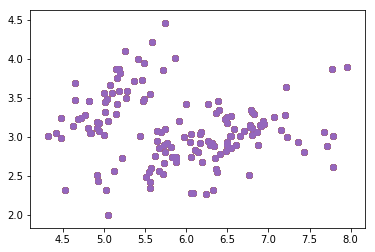

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
X= iris[:,0:2] # target value is the last column
print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

I think there are 4 clusters.

##

184.37150919


C:\Users\admin\Desktop\mltools\plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
C:\Users\admin\Desktop\mltools\plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
E:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\admin\Desktop\mltools\plot.py:64: MatplotlibDeprecationWarning: pyp

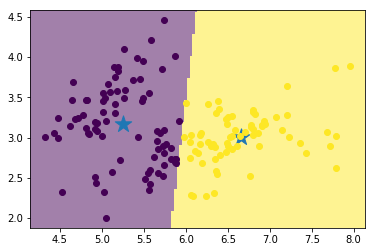

184.37150919


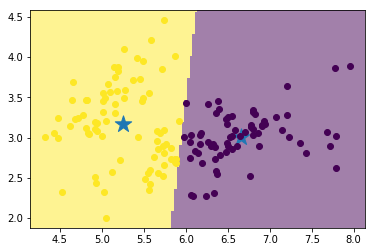

184.37150919


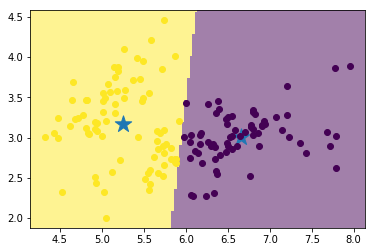

184.37150919


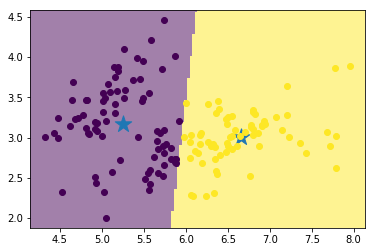

184.37150919


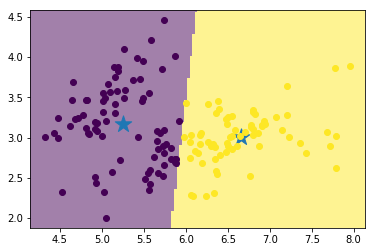

188.243347226


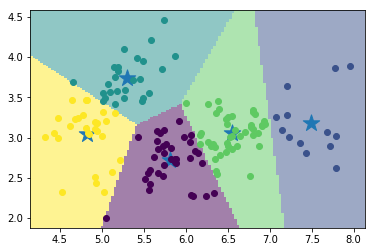

188.623784448


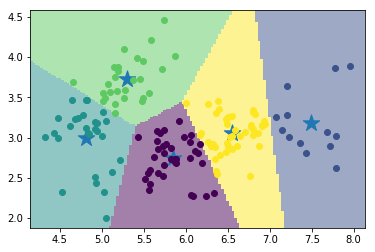

188.623784448


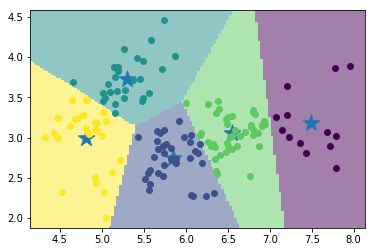

188.623784448


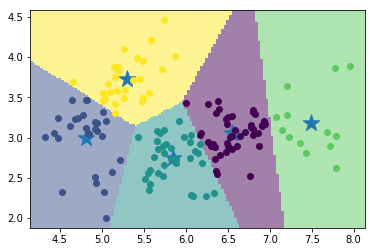

188.414685651


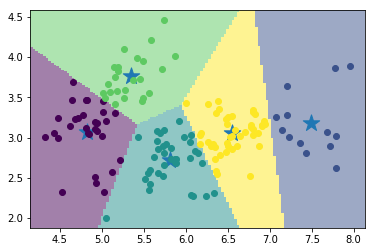

215.827104205


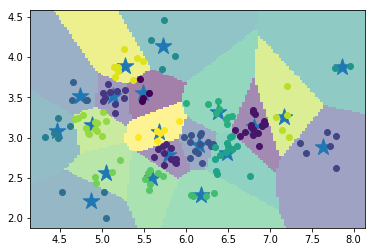

206.717885089


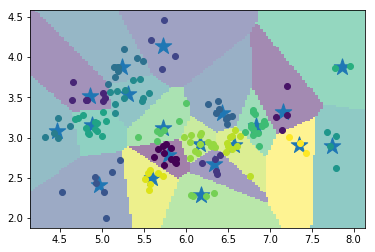

208.735690755


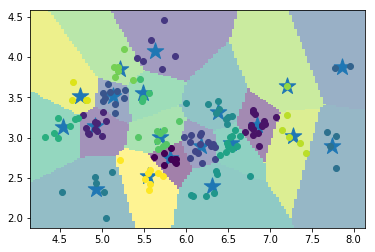

213.968664205


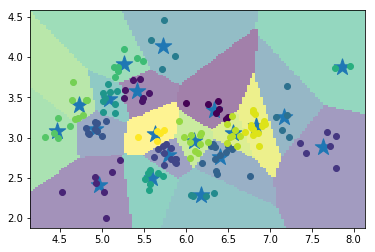

207.900593379


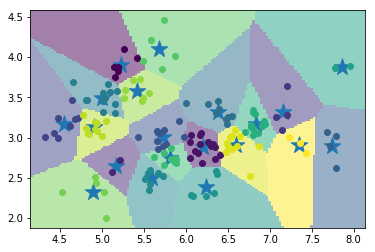

In [65]:
from sklearn.cluster import KMeans
from sklearn import metrics
 
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
X= iris[:,0:2] # target value is the last column
kcollec=[2,5,20]
for i in kcollec:
    s=[]
    for j in range(5):
        kmeans = KMeans(n_clusters=i)
        kmeans = kmeans.fit(X)
        labels = kmeans.predict(X)
        print(metrics.calinski_harabaz_score(X, labels))
        centroids = kmeans.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300)
        ml.plotClassify2D(kmeans, X, labels)
        plt.show()

From the graphs and scores above we can see that when K=2, all scores are the same,

but when K=5 and K=20, the performance depends on the initialization.

When K=5, graphs with score=188.623784448 is the best. When K=20, the one with score=215.827104205 is the best.

##

single linkage k= 2


C:\Users\admin\Desktop\mltools\plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
C:\Users\admin\Desktop\mltools\plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
E:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\admin\Desktop\mltools\plot.py:64: MatplotlibDeprecationWarning: pyp

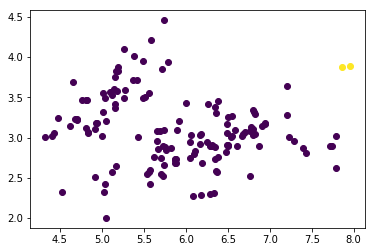

single linkage k= 5


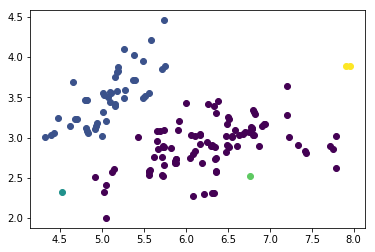

single linkage k= 20


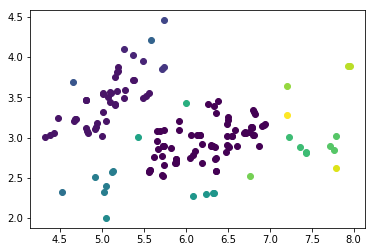

complete linkage k= 2


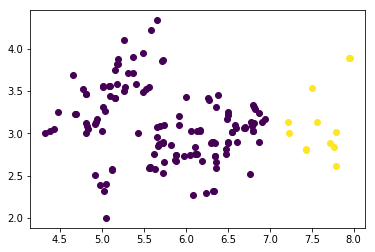

complete linkage k= 5


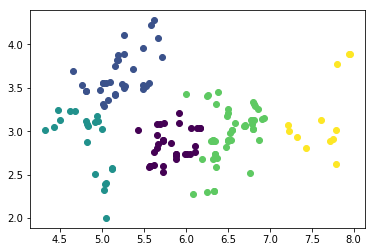

complete linkage k= 20


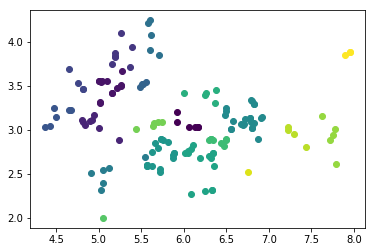

In [11]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
X= iris[:,0:2] # target value is the last column
kcollec=[2,5,20]
for i in kcollec:
    z,_=ml.cluster.agglomerative(X,i,method='min')
    ml.plotClassify2D(None, X, z)
    print("single linkage k=",i)
    plt.show()
for i in kcollec:
    z,_=ml.cluster.agglomerative(X,i,method='max')
    ml.plotClassify2D(None, X, z)
    print("complete linkage k=",i)
    plt.show()

##

Both Kmeans and agglomerative clustering use the calculation of distance as a measure for clustering.

But Kmeans depends on the initialization, different initializations may have different scores, so if you 

only use one initialization, it may not be the best. While agglomerative does not have initialization issue.

Also agglomerative clustering has complete linkage which considers all the data in the clustering, this makes

it more precise(At least from the result above).

# Problem 2

##

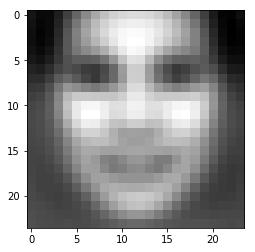

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
u=[]
for i in range(576):
    u.append(np.mean(X[:,i]))
X0=X-u
img = np.reshape(u,(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray")
plt.show()

##

In [3]:
from scipy.linalg import svd
U, s, V = svd(X0, full_matrices=False)
W = np.dot(U, np.diag(s))
print(W.shape)
print(V.shape)

(4916, 576)
(576, 576)


##

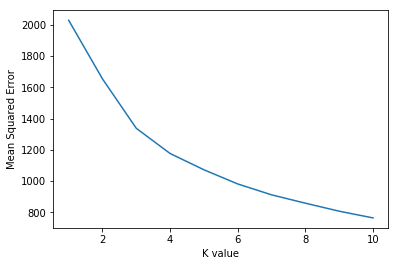

In [10]:
kcollect=[1,2,3,4,5,6,7,8,9,10]
result=[]
for k in kcollect:
    Xp=(np.dot(W[:,:k],V[:k,:]))
    result.append(np.mean( (X0-Xp)**2 ))
plt.plot(kcollect,result)
plt.xlabel('K value')
plt.ylabel('Mean Squared Error')
plt.show()

##

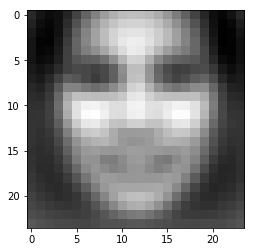

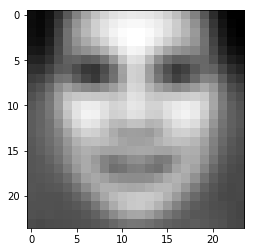

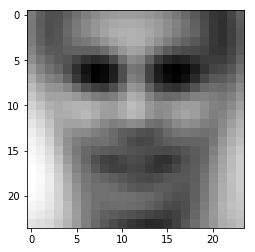

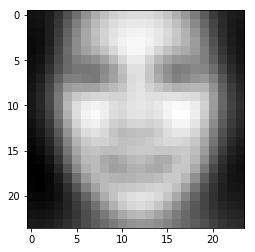

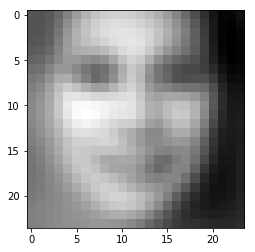

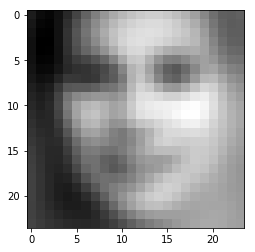

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from scipy.linalg import svd
X = np.genfromtxt("data/faces.txt", delimiter=None)
u=[]
for i in range(576):
    u.append(np.mean(X[:,i]))
X0=X-u
U, s, V = svd(X0, full_matrices=False)
W = np.dot(U, np.diag(s))
for j in range(3):
    alpha=2* np.median(np.abs(W[:,j]))
    img = np.reshape(u+np.dot(alpha,V[j,:]),(24,24)) # convert vectorized data to 24x24 image patches
    plt.imshow( img.T , cmap="gray")
    plt.show()
    img = np.reshape(u-np.dot(alpha,V[j,:]),(24,24)) # convert vectorized data to 24x24 image patches
    plt.imshow( img.T , cmap="gray")
    plt.show()

##

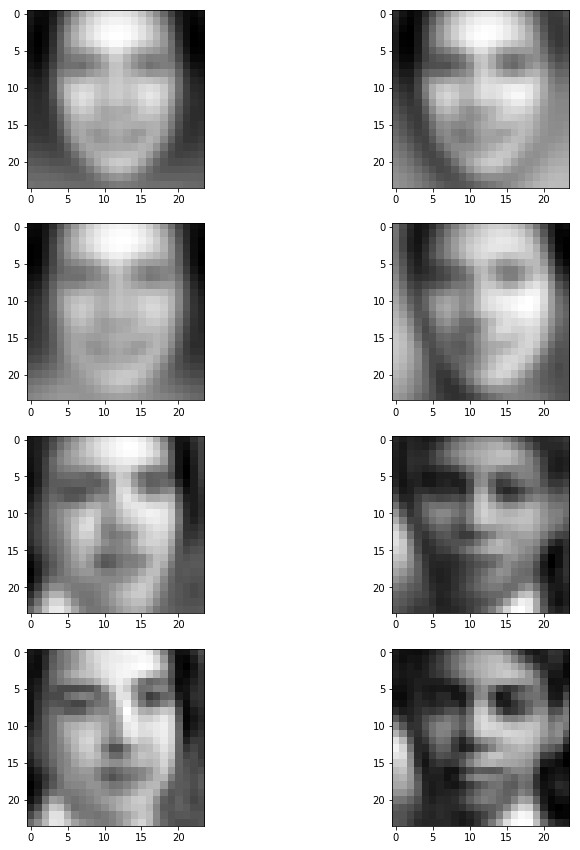

In [34]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from scipy.linalg import svd
X = np.genfromtxt("data/faces.txt", delimiter=None)
u=[]
kcollection=[5,10,50,100]
for i in range(576):
    u.append(np.mean(X[:,i]))
X0=X-u
U, s, V = svd(X0, full_matrices=False)
W = np.dot(U, np.diag(s))

f, ax = plt.subplots(4, 2, figsize=(12, 15))
idx=[2,5]
count=0
for p in range(len(kcollection)):
    for j in range(len(idx)):
        k=kcollection[p]
        i = idx[j]
        img = np.dot(W[i,:k], V[:k]) + u  # DON'T FORGET TO ADD THE MU
        img = np.reshape(img,(24,24))  # reshape flattened data into a 24*24 patch
    # We've seen the imshow method in the previous discussion :)
        ax[p][j].imshow( img.T , cmap="gray")
plt.show()


##

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
E:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


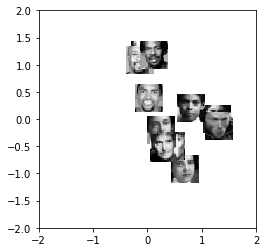

In [1]:
import mltools.transforms
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from scipy.linalg import svd
X = np.genfromtxt("data/faces.txt", delimiter=None)
u=[]
for i in range(576):
    u.append(np.mean(X[:,i]))
X0=X-u
U, s, V = svd(X0, full_matrices=False)
W = np.dot(U, np.diag(s))
idx = [1,2,3,4,5,7,9,11,20,25,30]# pick some data (randomly or otherwise); an array of integer indices

coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
plt.figure(); plt.hold(True); # you may need this for pyplot
for i in idx:
# compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale
plt.show()

# Statement of Collaboration

In [ ]:
No disscussion with others.